In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

loan_data=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/credit.csv")
    

In [2]:
loan_data

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [3]:
mode1=loan_data["checking_balance"].mode().values[0]
loan_data["checking_balance"]=loan_data["checking_balance"].replace(np.nan,mode1)

In [4]:
import seaborn as sns

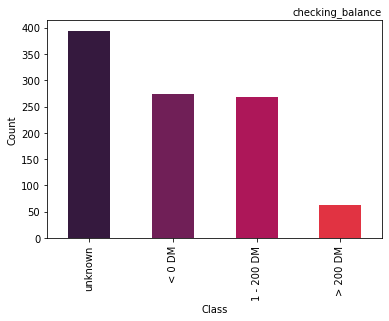

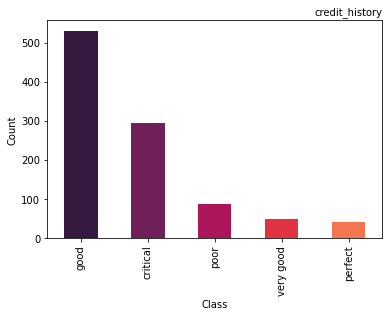

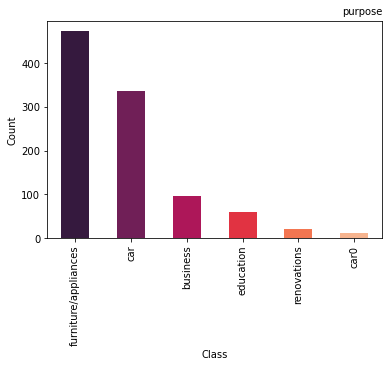

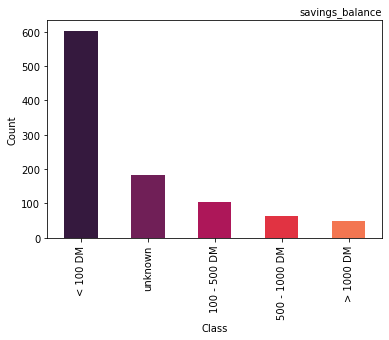

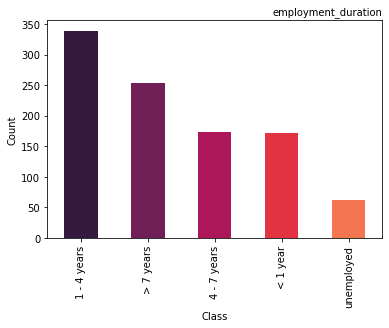

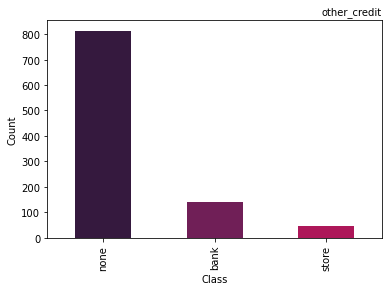

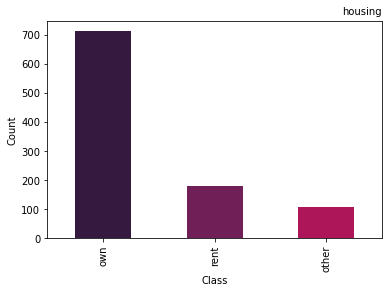

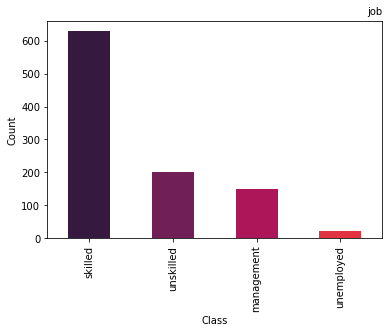

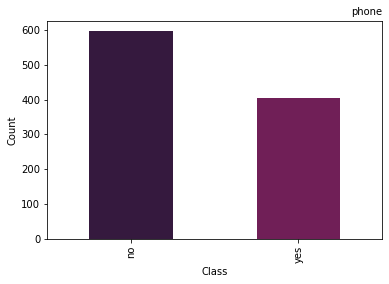

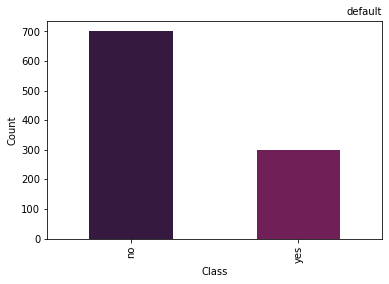

In [5]:
for col in loan_data.select_dtypes(include=["object"]).columns:
    loan_data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

In [6]:
loan_data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [8]:
loan_data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [9]:
dummies=pd.get_dummies(loan_data[["phone","default","purpose","checking_balance","credit_history","savings_balance","employment_duration","other_credit","housing","job"]],
                       columns=["phone","default","purpose","checking_balance","credit_history","savings_balance","employment_duration","other_credit","housing","job"])

In [10]:
dummies.head()

,phone_no,phone_yes,default_no,default_yes,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,0,1,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,1,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,1,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [11]:
columns=["phone","default","purpose","checking_balance","credit_history","savings_balance","employment_duration","other_credit","housing","job"]
loan_data=pd.concat([loan_data,dummies],axis=1)
loan_data.drop(columns,axis=1,inplace=True)

In [12]:
import seaborn as sns


In [13]:
duplicate=loan_data.duplicated()
print(duplicate.sum())
loan_data[duplicate]

0


,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone_no,phone_yes,default_no,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled


In [14]:
loan_data.dtypes

months_loan_duration               int64
amount                             int64
percent_of_income                  int64
years_at_residence                 int64
age                                int64
existing_loans_count               int64
dependents                         int64
phone_no                           uint8
phone_yes                          uint8
default_no                         uint8
default_yes                        uint8
purpose_business                   uint8
purpose_car                        uint8
purpose_car0                       uint8
purpose_education                  uint8
purpose_furniture/appliances       uint8
purpose_renovations                uint8
checking_balance_1 - 200 DM        uint8
checking_balance_< 0 DM            uint8
checking_balance_> 200 DM          uint8
checking_balance_unknown           uint8
credit_history_critical            uint8
credit_history_good                uint8
credit_history_perfect             uint8
credit_history_p

<function matplotlib.pyplot.show(close=None, block=None)>

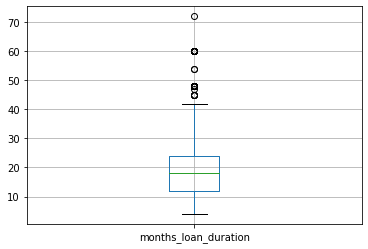

In [15]:
loan_data.boxplot(column=["months_loan_duration"])
plt.show

In [16]:
#def is the key board for function 
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5 * IQR)
    upper_range=Q3+(1.5 * IQR)
    return lower_range,upper_range

In [17]:
lowincome,uppincome=remove_outlier(loan_data['months_loan_duration'])
loan_data['months_loan_duration']=np.where(loan_data['months_loan_duration']>uppincome,uppincome,loan_data['months_loan_duration'])
loan_data['months_loan_duration']=np.where(loan_data['months_loan_duration']<lowincome,lowincome,loan_data['months_loan_duration'])

In [18]:
lowincome,uppincome=remove_outlier(loan_data['amount'])
loan_data['amount']=np.where(loan_data['amount']>uppincome,uppincome,loan_data['amount'])
loan_data['amount']=np.where(loan_data['amount']<lowincome,lowincome,loan_data['amount'])

In [22]:
lowincome,uppincome=remove_outlier(loan_data['percent_of_income'])
loan_data['percent_of_income']=np.where(loan_data['percent_of_income']>uppincome,uppincome,loan_data['percent_of_income'])
loan_data['percent_of_income']=np.where(loan_data['percent_of_income']<lowincome,lowincome,loan_data['percent_of_income'])

In [23]:
lowincome,uppincome=remove_outlier(loan_data['age'])
loan_data['age']=np.where(loan_data['age']>uppincome,uppincome,loan_data['age'])
loan_data['age']=np.where(loan_data['age']<lowincome,lowincome,loan_data['age'])

In [24]:
lowincome,uppincome=remove_outlier(loan_data['existing_loans_count'])
loan_data['existing_loans_count']=np.where(loan_data['percent_of_income']>uppincome,uppincome,loan_data['existing_loans_count'])
loan_data['existing_loans_count']=np.where(loan_data['existing_loans_count']<lowincome,lowincome,loan_data['existing_loans_count'])

In [25]:
lowincome,uppincome=remove_outlier(loan_data['dependents'])
loan_data['dependents']=np.where(loan_data['dependents']>uppincome,uppincome,loan_data['dependents'])
loan_data['dependents']=np.where(loan_data['dependents']<lowincome,lowincome,loan_data['dependents'])

<function matplotlib.pyplot.show(close=None, block=None)>

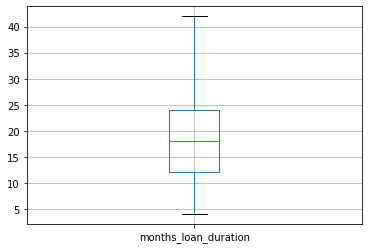

In [26]:
loan_data.boxplot(column=["months_loan_duration"])
plt.show

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [28]:
print(loan_data.info)

<bound method DataFrame.info of      months_loan_duration  amount  percent_of_income  years_at_residence  \
0                     6.0  1169.0                4.0                   4   
1                    42.0  5951.0                2.0                   2   
2                    12.0  2096.0                2.0                   3   
3                    42.0  7882.0                2.0                   4   
4                    24.0  4870.0                3.0                   4   
..                    ...     ...                ...                 ...   
995                  12.0  1736.0                3.0                   4   
996                  30.0  3857.0                4.0                   4   
997                  12.0   804.0                4.0                   4   
998                  42.0  1845.0                4.0                   4   
999                  42.0  4576.0                3.0                   4   

      age  existing_loans_count  dependents  phone_no  

TypeError: annotate() missing 1 required positional argument: 'text'

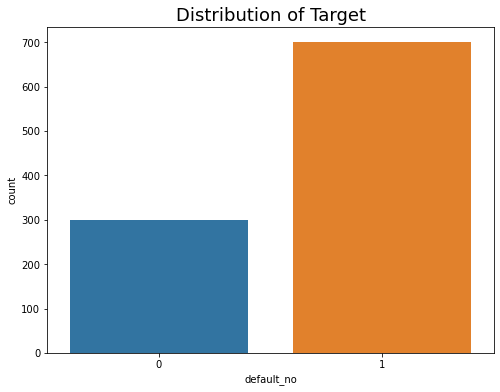

In [29]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=loan_data['default_no'])
target_count = loan_data.default_no.value_counts()
plt.annotate(s=target_count[0], xy=(0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

TypeError: annotate() missing 1 required positional argument: 'text'

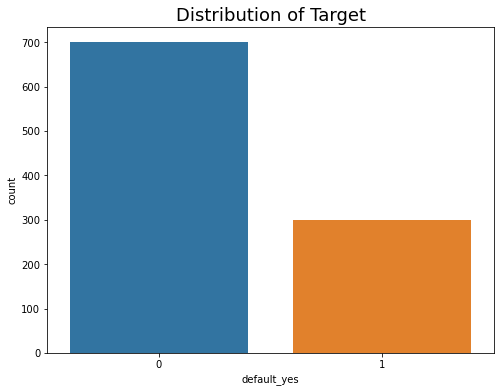

In [30]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Target', size=18)
sns.countplot(x=loan_data['default_yes'])
target_count = loan_data.default_no.value_counts()
plt.annotate(s=target_count[0], xy=(0.04,10+target_count[0]), size=14)
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

In [31]:
# lets build our linear model
# independant variables
X = loan_data.drop(['default_yes'], axis=1)
# the dependent variable
y = loan_data[['default_yes']]

In [32]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [33]:
reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
reg_model.score(X_train, y_train)

0.9928571428571429

In [35]:
reg_model.score(X_test,y_test)

0.9866666666666667

In [36]:
predictions=reg_model.predict(X_test)

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       214
           1       1.00      0.95      0.98        86

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



<AxesSubplot:>

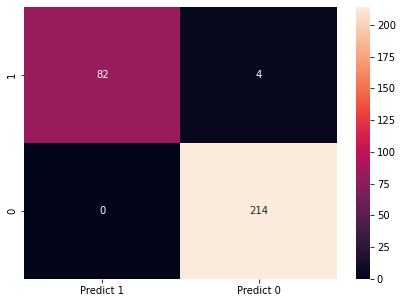

In [38]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [39]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
    

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [40]:
clf.score(X_train,y_train)

0.9985714285714286

In [41]:
clf.score(X_test,y_test)

0.9933333333333333

In [42]:
loan = loan_data.default_yes.value_counts().to_frame().rename(columns={"default_yes":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

,absolute,percent
0,700,70.0
1,300,30.0


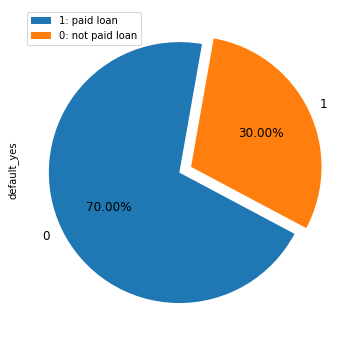

In [43]:
# pie chart
loan_data.default_yes.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["1: paid loan","0: not paid loan"]);

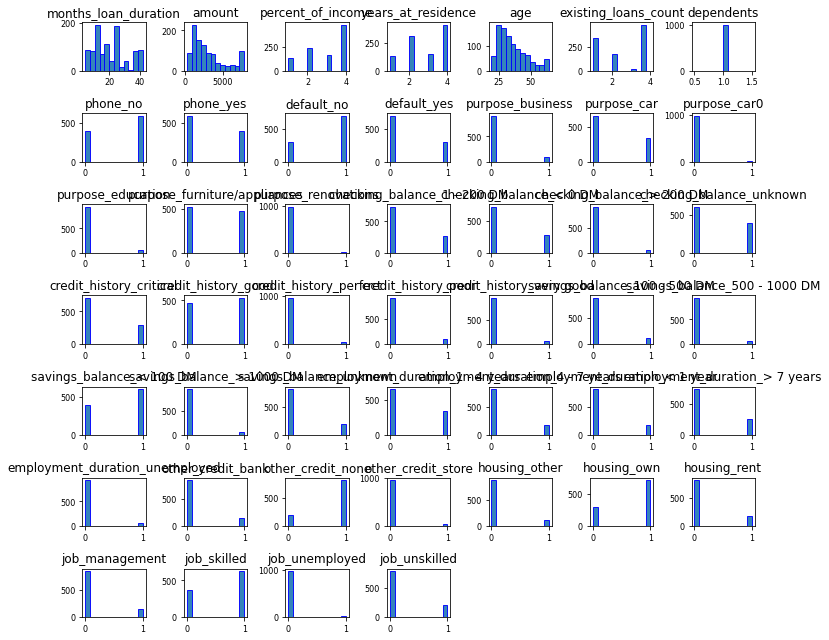

In [44]:
loan_data.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn=KNeighborsClassifier(n_neighbors=20,p=2)

In [47]:
knn.fit(X_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [48]:
knn.score(X_train,y_train)

0.7028571428571428

In [49]:
knn.score(X_test,y_test)

0.73